2022-04-26 <br/>
Kaggle Hidden Gems <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-04-26/readme.md

Generate N(2)-Grams - Completed <br/>
Basic NLP visualizations - Completed 

In [33]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='jupyterlab'
import os

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-04-26/hidden_gems.csv')

In [3]:
df.head()

,vol,date,link_forum,link_twitter,notebook,author_kaggle,title,review,author_name,author_twitter,author_linkedin,notes
0,1,2020-05-12,https://www.kaggle.com/general/150603,https://twitter.com/heads0rtai1s/status/126028...,https://www.kaggle.com/hansjoerg/glmnet-xgboos...,hansjoerg,"Glmnet, XGBoost, and SVM Using tidymodels",A well-structured and documented tutorial on h...,Hansjoerg,https://twitter.com/hansjoerg_me,NaN,NaN
1,1,2020-05-12,https://www.kaggle.com/general/150603,https://twitter.com/heads0rtai1s/status/126028...,https://www.kaggle.com/parulpandey/breathe-ind...,parulpandey,Breathe India: COVID-19 effect on Pollution,A detailed work studying the interaction betwe...,Parul Pandey,https://twitter.com/pandeyparul,https://www.linkedin.com/in/parul-pandey-a5498...,NaN
2,1,2020-05-12,https://www.kaggle.com/general/150603,https://twitter.com/heads0rtai1s/status/126028...,https://www.kaggle.com/jonathanbouchet/u-s-com...,jonathanbouchet,U.S. Commercial Flights Tracker Map,Stunning maps are accompanied by lots of other...,Jonathan Bouchet,NaN,https://www.linkedin.com/in/jonathanbouchet,NaN
3,2,2020-05-19,https://www.kaggle.com/general/152383,https://twitter.com/heads0rtai1s/status/126279...,https://www.kaggle.com/andradaolteanu/unbiased...,andradaolteanu,Unbiased Look on Brazil Wildfires,A well-focused analysis on a globally importan...,Andrada Olteanu,https://twitter.com/andradaolteanuu,https://www.linkedin.com/in/andrada-olteanu-38...,NaN
4,2,2020-05-19,https://www.kaggle.com/general/152383,https://twitter.com/heads0rtai1s/status/126279...,https://www.kaggle.com/tunguz/mnist-2d-t-sne-w...,tunguz,MNIST 2D t-SNE with Rapids,One of the first Notebooks on Kaggle demonstra...,Bojan Tunguz,https://twitter.com/tunguz,https://www.linkedin.com/in/tunguz,NaN


In [4]:
df_review = pd.DataFrame()
df_review['review']= df.review.copy(deep=True)

In [12]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

import string
import collections

In [10]:
def remove_Stopwords(text ):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)
    

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()

In [27]:
df_review['new'] = df_review['review'].apply(clean_text)
df_review['new'] = df_review['new'].apply(remove_Stopwords)
df_review['new'] = df_review['new'].apply(lemmatize_text)

0      wellstructured documented tutorial use new tid...
1      detailed work studying interaction big topic c...
2      stunning map accompanied lot fantastic visuals...
3      wellfocused analysis globally important topic ...
4      one first notebook kaggle demonstrating gamech...
                             ...                        
295    clustering analysis great visuals detailed int...
296    work present comprehensive study covid19 progr...
297    detailed exploration basketball award category...
298    work analysis global inequality wealth evoluti...
299    indepth investigation fitness tracker data sho...
Name: new, Length: 300, dtype: object

In [31]:
def count_ngrams(series: pd.Series, n: int) -> pd.Series:
    ngrams = series.copy().str.split(' ').explode()
    for i in range(1, n):
        ngrams += ' ' + ngrams.groupby(level=0).shift(-i)
        ngrams = ngrams.dropna()
    return ngrams.value_counts().rename_axis('bigrams').reset_index(name='counts')    

In [34]:
bigram = count_ngrams(df_review.new,2)
bigram

,bigrams,counts
0,work present,14
1,detailed interpretation,14
2,kaggle surveyhttpswwwkagglecomckagglesurvey2021,11
3,kaggle surveyhttpswwwkagglecomckagglesurvey2020,11
4,time series,10
...,...,...
4044,job hunter,1
4045,hunter dsml,1
4046,dsml featuring,1
4047,analysis airbnb,1


In [36]:
fig = px.bar(bigram[:10], x='bigrams', y='counts', title='Counts of top bigrams', template='plotly_white', labels={'bigrams': 'Bigram', 'count': 'Count'})
fig.show()

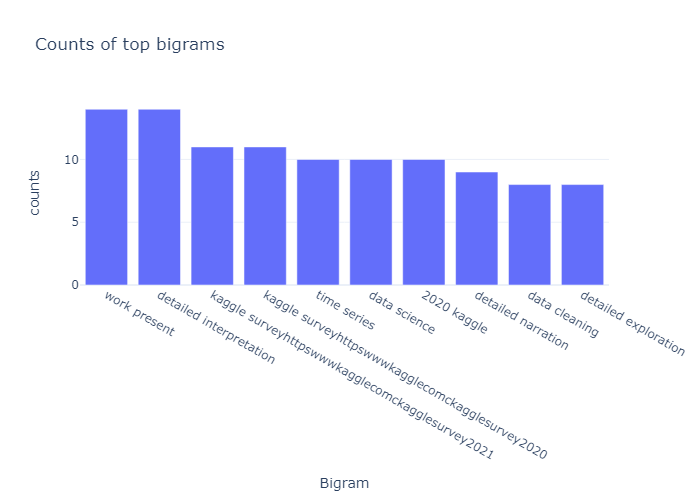

In [37]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)


In [38]:
df_review.new[1]

'detailed work studying interaction big topic covid19 air pollution past recent data india'

In [40]:
import spacy
nlp=spacy.load('en_core_web_sm')
from spacy import displacy
doc=nlp(df_review.new[1])
displacy.render(doc, style='dep')

In [41]:
doc1=nlp(df_review.new[1])
options={'distance':110,'compact':'True', 'color':'white','bg':'#FF5733','font':'Times'}
displacy.render(doc1, style='dep',options=options)